<a href="https://colab.research.google.com/github/becamarotti/MVP-Sprint-Machine-Learning-e-Analytics/blob/main/BernardoCamarotti_MVP_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MVP - Bernardo Camarotti - SPRINT II - Machine Learning & Analytics
#Machine Learning
## Gender Classification

Com o intuito de aprender e me aprofundar em aprendizado de máquina, escolhi um dataset de classificação de gênero. O conjunto de dados selecionado contém uma variedade de características relevantes para a previsão do gênero de um indivíduo.

Cada coluna do dataset representa uma característica específica de pessoas fictícias, e cada exemplo no conjunto de dados está associado a um gênero específico (Masculino ou Feminino), com base nas informações disponíveis.

É importante ressaltar que os dados são inventados, permitindo explorar o problema de classificação sem violar a privacidade ou utilizar informações reais de pessoas.

O conjunto de dados foi obtido no site Kaggle, podendo ser encontrado no link a seguir: https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset

Com base nesse conjunto de dados, meu objetivo é desenvolver e treinar um modelo de aprendizado de máquina capaz de prever com a maior acurácia possível o gênero de um indivíduo com base em suas características.

## Conjunto de Dados

**long_hair:** Esta coluna indica se a pessoa tem cabelo comprido ou não. O valor 0 representa cabelo não comprido e o valor 1 representa cabelo comprido.

**forehead_width_cm:** Esta coluna indica a largura da testa da pessoa em centímetros, medida da direita para a esquerda.

**forehead_height_cm:** Esta coluna indica a altura da testa da pessoa em centímetros, medida desde onde o cabelo cresce até as sobrancelhas.

**nose_wide:** Esta coluna indica se o nariz da pessoa é largo ou não. O valor 0 representa nariz não largo e o valor 1 representa nariz largo.

**nose_long:** Esta coluna indica se o nariz da pessoa é comprido ou não. O valor 0 representa nariz não comprido e o valor 1 representa nariz comprido.

**lips_thin:** Esta coluna indica se os lábios da pessoa são finos ou não. O valor 0 representa lábios não finos e o valor 1 representa lábios finos.

**distance_nose_to_lip_long:** Esta coluna indica a distância entre o nariz e o lábio da pessoa. O valor 0 representa distância não longa e o valor 1 representa distância longa.

**gender:** Esta coluna indica o gênero da pessoa. O valor 0 representa masculino e o valor 1 representa feminino.


## 1. Importando as bibliotecas

As linhas a seguir importam as bibliotecas necessárias para a análise e modelagem dos dados.

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #biblioteca para criação de gráficos
import seaborn as sns #biblioteca para criação de gráfico heatmap
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## 2. Importando o dataset e analisando os dados

As linhas a seguir importam o conjunto de dados para dentro do notebook e exibe as primeiras linhas do dataset.

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/becamarotti/MVP-Sprint-Machine-Learning-e-Analytics/main/gender_classification_v7.csv') # Carregando o dataset para dentro do notebook
print(dataset.shape) # Exibir a quantidade de linhas e colunas, respectivamente
dataset.head() # Exibir as primeiras linhas do dataset

(5001, 8)


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
#transformando a coluna 'gender' em numérico
dataset['gender'] = dataset['gender'].replace({'Male' : 0, 'Female': 1}, regex=True)

In [ ]:
# Exibir as primeiras 10 linhas do dataset após a alteração
dataset.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1
5,1,13.0,6.8,1,1,1,1,0
6,1,15.3,6.2,1,1,1,0,0
7,0,13.0,5.2,0,0,0,0,1
8,1,11.9,5.4,1,0,1,1,1
9,1,12.1,5.4,0,0,0,0,1


In [ ]:
# Exibe um resumo do dataset, mostrando as colunas e o tipo dos dados
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.7 KB
None


In [ ]:
# Verificando sem possuem valores nulos em nosso dataset
dataset.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

Podemos notar que não temos valores nulos em nosso conjunto de dados.

In [ ]:
# Entendendo melhor os dados presentes no dataset
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
long_hair,5001.0,0.869626,0.336748,0.0,1.0,1.0,1.0,1.0
forehead_width_cm,5001.0,13.181484,1.107128,11.4,12.2,13.1,14.0,15.5
forehead_height_cm,5001.0,5.946311,0.541268,5.1,5.5,5.9,6.4,7.1
nose_wide,5001.0,0.493901,0.500013,0.0,0.0,0.0,1.0,1.0
nose_long,5001.0,0.507898,0.499988,0.0,0.0,1.0,1.0,1.0
lips_thin,5001.0,0.493101,0.500002,0.0,0.0,0.0,1.0,1.0
distance_nose_to_lip_long,5001.0,0.498900,0.500049,0.0,0.0,0.0,1.0,1.0
gender,5001.0,0.500100,0.500050,0.0,0.0,1.0,1.0,1.0


In [ ]:
# Verificando quantos dados distintos temos no dataset
for coluna in dataset.columns:
    print('{}: {} distinct count'.format(coluna, dataset[coluna].nunique()))

long_hair: 2 distinct count
forehead_width_cm: 42 distinct count
forehead_height_cm: 21 distinct count
nose_wide: 2 distinct count
nose_long: 2 distinct count
lips_thin: 2 distinct count
distance_nose_to_lip_long: 2 distinct count
gender: 2 distinct count


As informações acima mostram as contagens distintas de valores em cada coluna, permitindo a afirmação de que existem apenas dois tipos de valores em determinadas colunas.

Além disso, analisando o resumo, confirmamos que a coluna que usaremos de 'target' é um problema de classificação.

<Axes: >

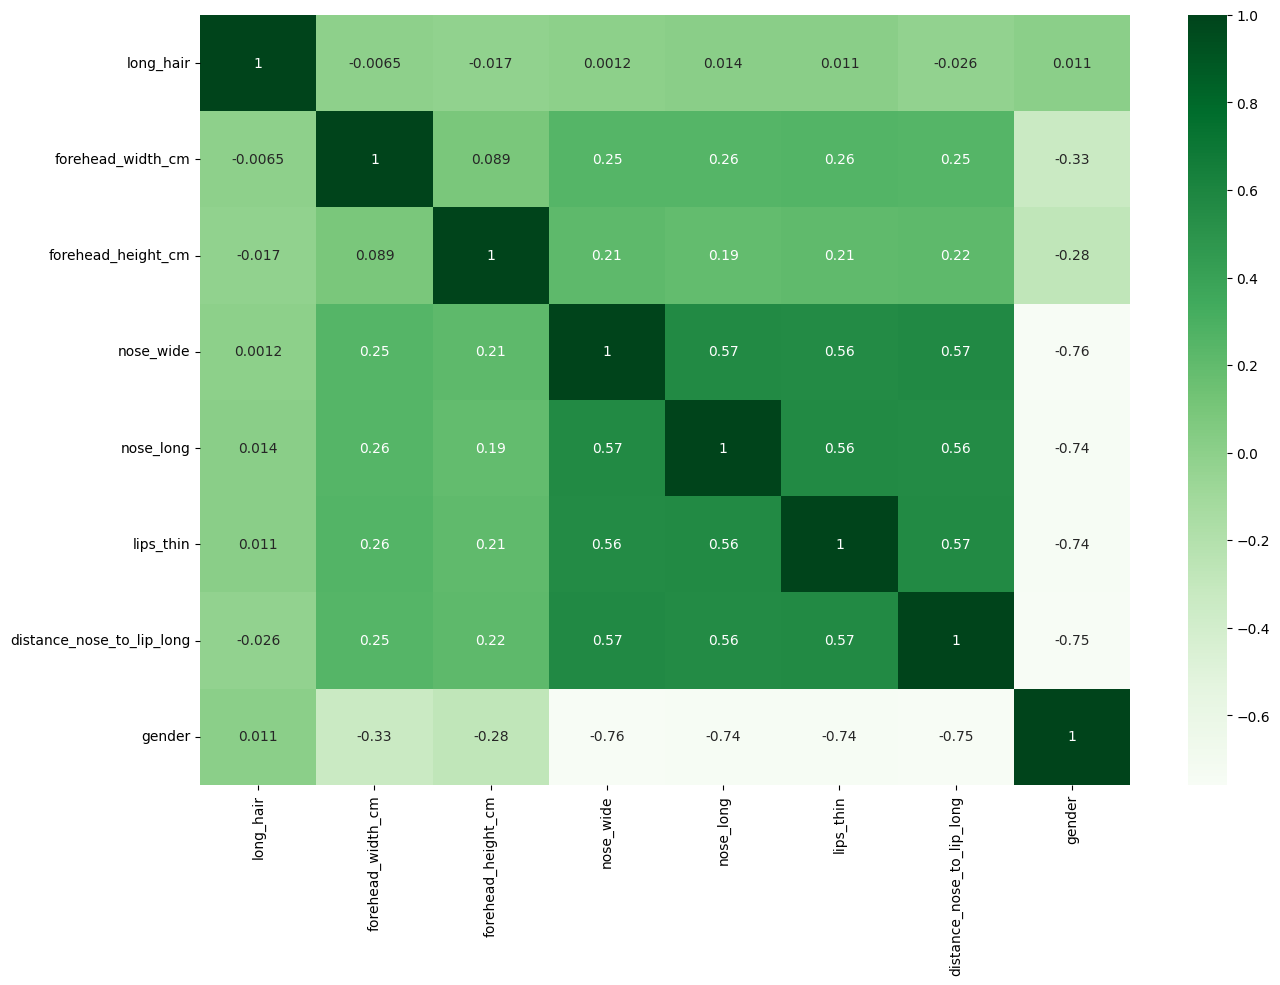

In [ ]:
# Criando um mapa de calor das correlações entre as colunas do dataset

plt.figure(figsize=(15, 10))
sns.heatmap(dataset.corr(), annot=True, cmap='Greens')

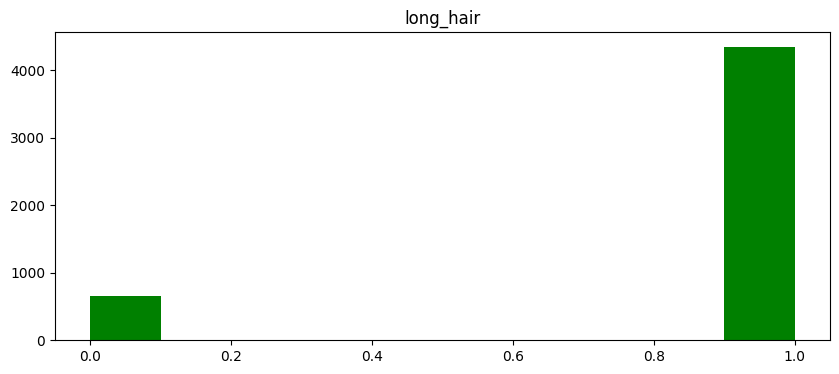

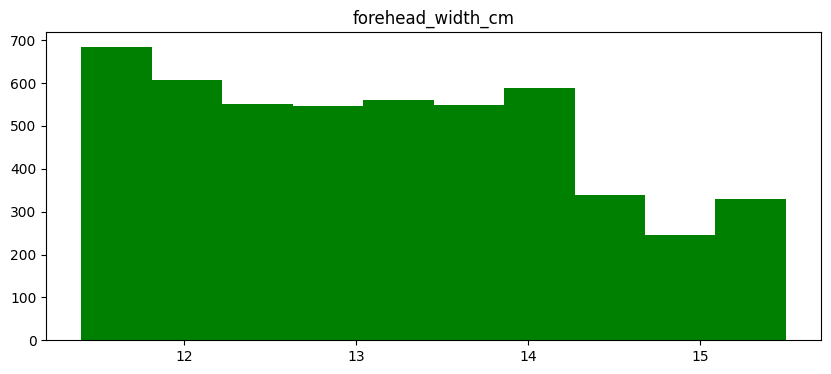

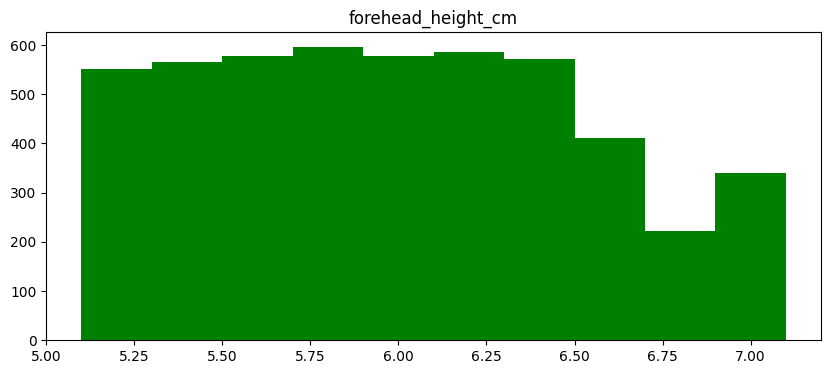

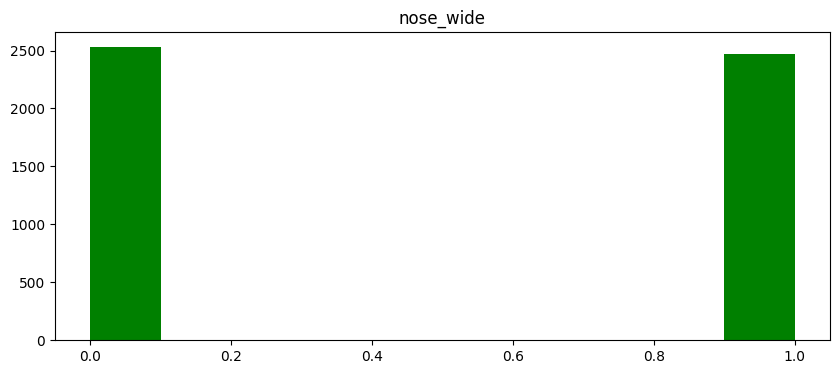

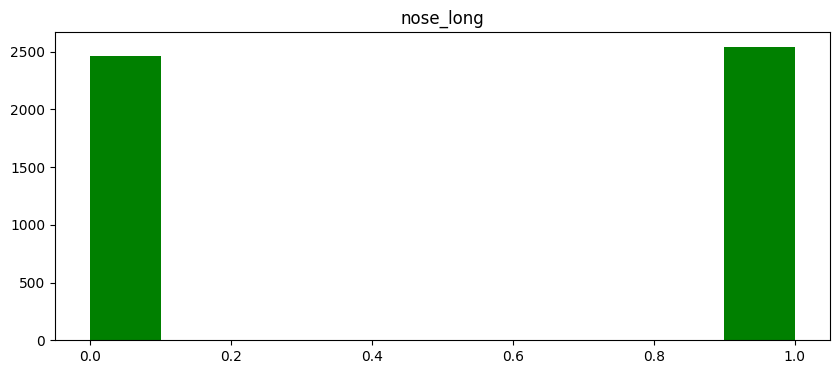

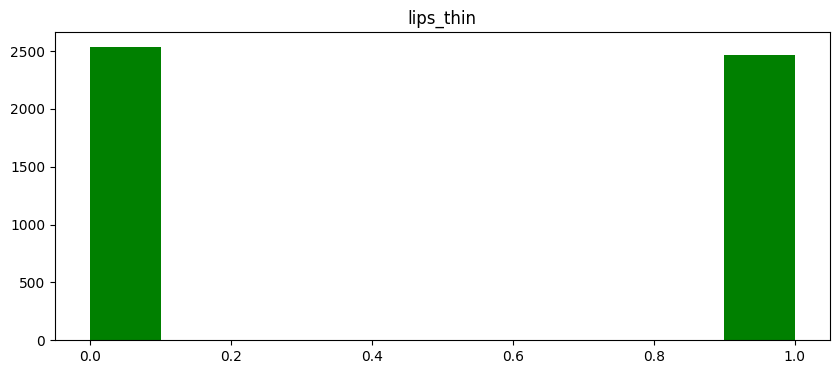

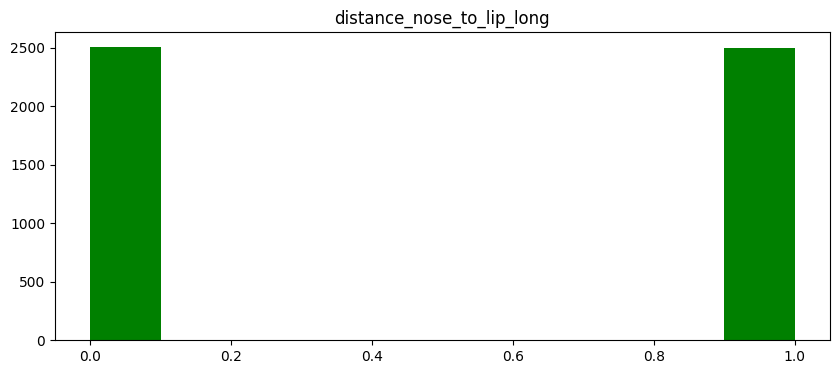

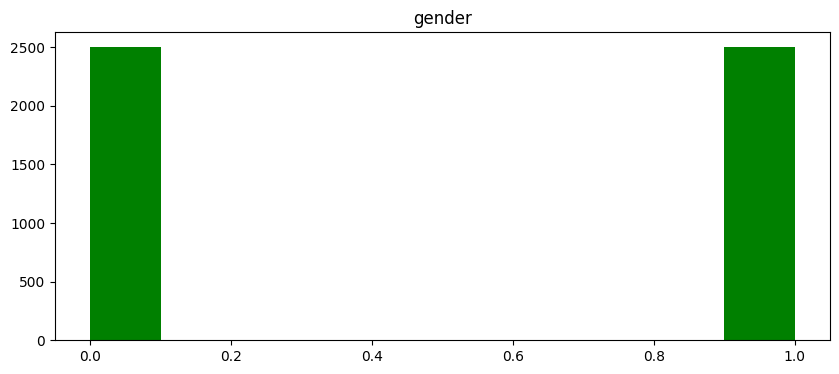

In [ ]:
#exibindo um gráfico de barras com os valores presentes nas colunas do dataset
for coluna in dataset.columns:
    plt.figure(figsize=(10, 4))
    plt.title(coluna)
    plt.hist(dataset[coluna],color="green")
    plt.show()


Conseguimos observar que é um dataset equilibrado na quantidade de pessoas do gênero masculino e feminino

In [ ]:
# mostrando a quantidade de 'Male' e 'Female' na coluna gender
counts = dataset['gender'].value_counts()
print(counts)

1    2501
0    2500
Name: gender, dtype: int64


# 3. Separando os dados em conjunto de treinamento e teste e validação cruzada do modelo

Utilizaremos 20% do dataset para teste e 80% para treinamento.

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 5 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:7]
y = array[:,7]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

# 4. Criação e avaliação dos modelos de Machine Learning

Modelos Básicos

LR: 0.966250 (0.008606)
KNN: 0.965750 (0.010065)
CART: 0.963500 (0.011358)
NB: 0.971000 (0.009097)
SVM: 0.968750 (0.009763)
Bagging: 0.963500 (0.009367)
RF: 0.969500 (0.010050)
ET: 0.965500 (0.007566)
Ada: 0.971000 (0.008818)
GB: 0.972750 (0.008548)
Voting: 0.968750 (0.010383)


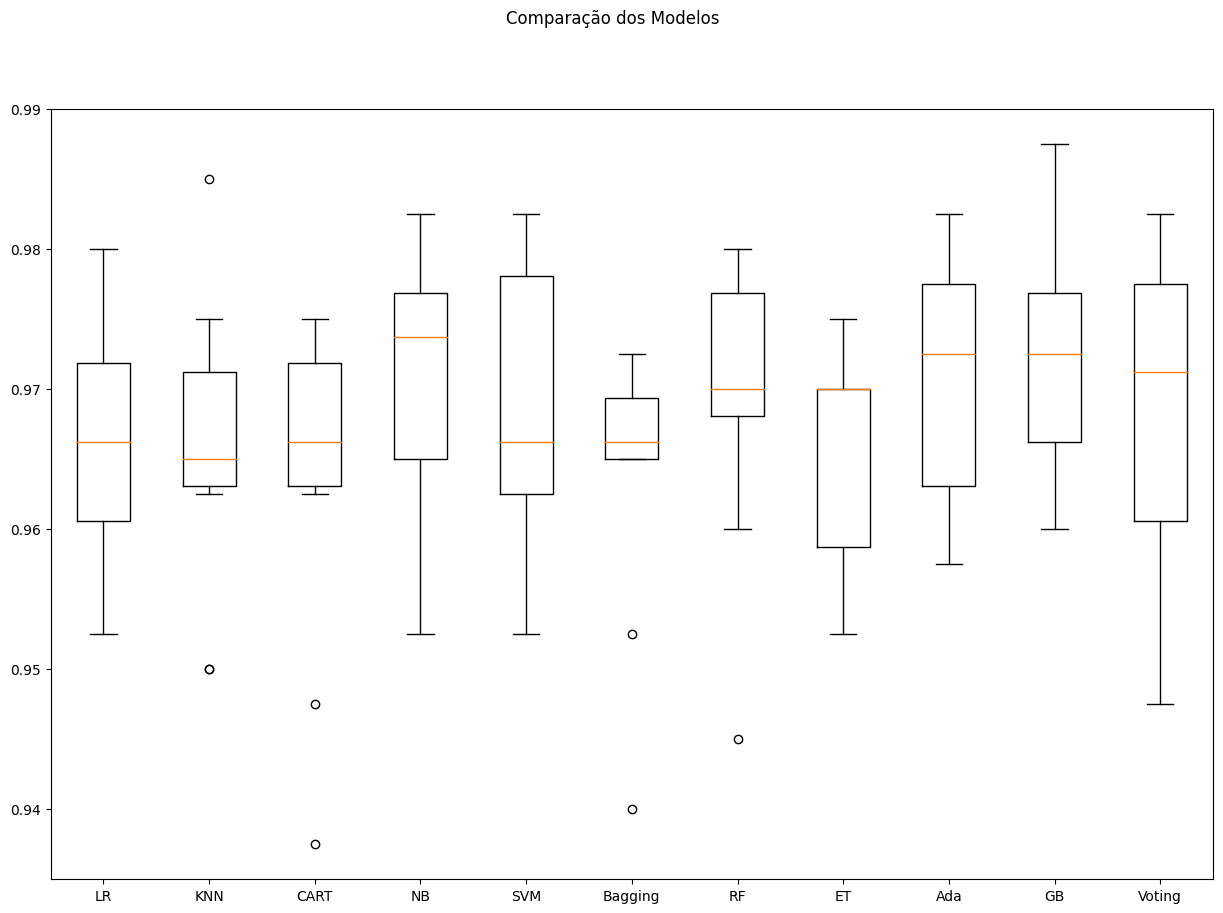

In [ ]:
np.random.seed(seed) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Padronização, Normalização e Pipelines

LR-orig: 0.966 (0.009)
KNN-orig: 0.966 (0.010)
CART-orig: 0.964 (0.011)
NB-orig: 0.971 (0.009)
SVM-orig: 0.969 (0.010)
Bag-orig: 0.964 (0.009)
RF-orig: 0.969 (0.010)
ET-orig: 0.966 (0.008)
Ada-orig: 0.971 (0.009)
GB-orig: 0.973 (0.009)
Vot-orig: 0.969 (0.010)
LR-padr: 0.966 (0.009)
KNN-padr: 0.964 (0.009)
CART-padr: 0.964 (0.011)
NB-padr: 0.971 (0.009)
SVM-padr: 0.971 (0.011)
Bag-padr: 0.964 (0.011)
RF-padr: 0.971 (0.009)
ET-padr: 0.966 (0.009)
Ada-padr: 0.971 (0.009)
GB-padr: 0.973 (0.009)
Vot-padr: 0.971 (0.012)
LR-norm: 0.966 (0.009)
KNN-norm: 0.962 (0.008)
CART-norm: 0.965 (0.011)
NB-norm: 0.971 (0.009)
SVM-norm: 0.967 (0.009)
Bag-norm: 0.966 (0.010)
RF-norm: 0.970 (0.011)
ET-norm: 0.965 (0.007)
Ada-norm: 0.971 (0.009)
GB-norm: 0.973 (0.009)
Vot-norm: 0.969 (0.011)


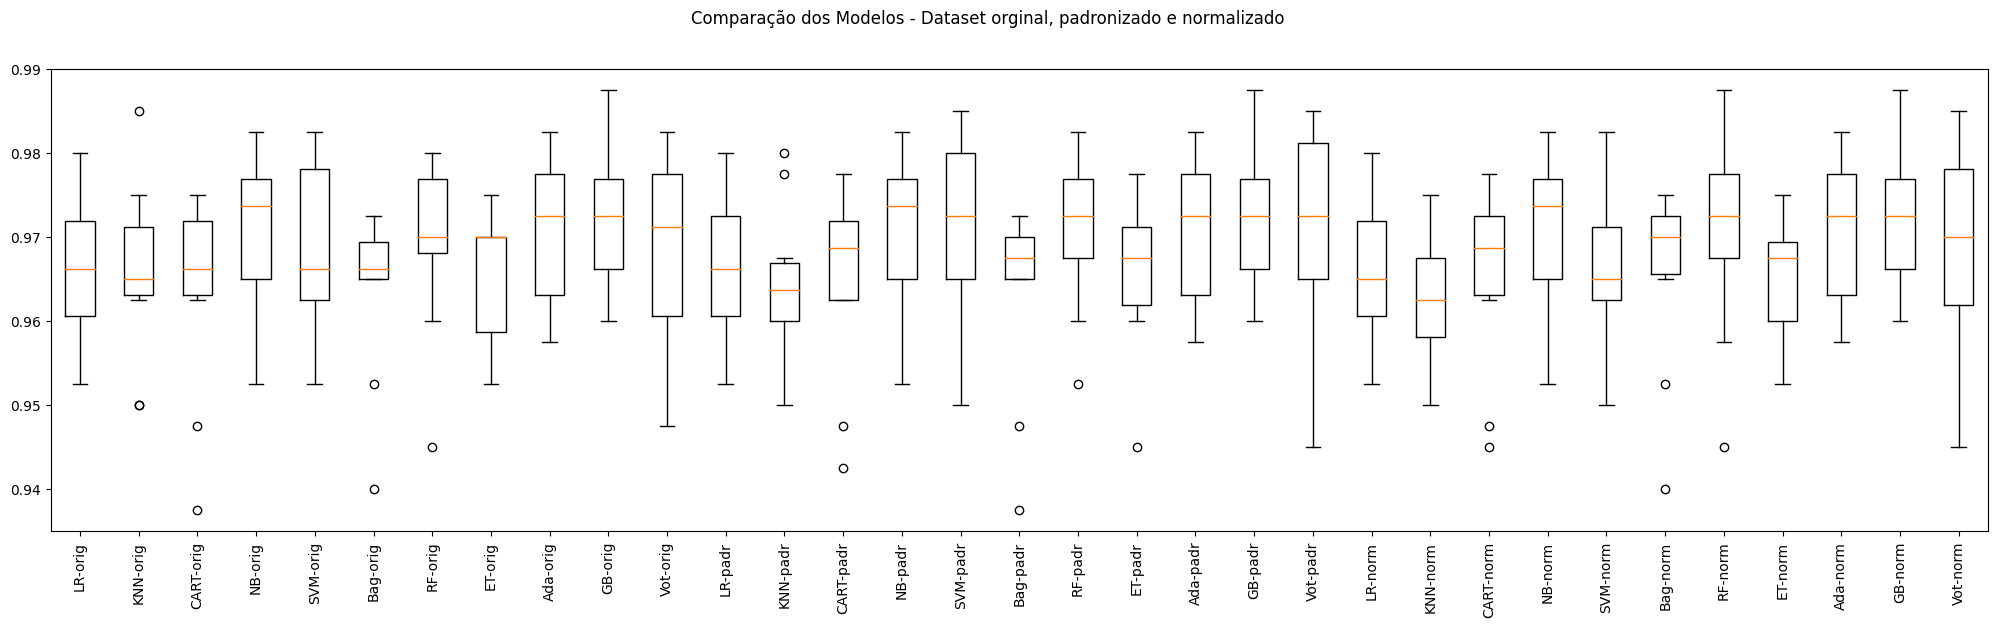

In [ ]:
np.random.seed(seed) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

# 5. Feature Selection

Realizamos o feature selection no modelo para ver se a acurácia dos modelos melhora com os dados mais relevantes.

Nesse primeiro momento, vamos descobrir as colunas que possuem odados mais relevantes.

In [ ]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:7])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset.columns[0:7]))


Número original de atributos: 7

Número reduzido de atributos: 4

Atributos Originais: Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long'],
      dtype='object')

Scores dos Atributos Originais: [5.796e-01 6.282e+02 4.161e+02 6.772e+03 6.203e+03 6.173e+03 6.621e+03]

Atributos Selecionados: ['nose_wide' 'nose_long' 'lips_thin' 'distance_nose_to_lip_long']


In [ ]:
# Eliminação Recursiva de Atributos

# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=4)
fit = rfe.fit(X, y)

# Print dos resultados
print("Atributos Originais:", dataset.columns[0:7])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
# e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=dataset.columns[0:7]))

Atributos Originais: Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long'],
      dtype='object')

Atributos Selecionados: [False False False  True  True  True  True]

Ranking de atributos: [4 3 2 1 1 1 1]

Qtd de melhores Atributos: 4

Nomes dos Atributos Selecionados: ['nose_wide' 'nose_long' 'lips_thin' 'distance_nose_to_lip_long']


In [ ]:
# Importância de Atributos com ExtraTrees

# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:7])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo).
print(modelo.feature_importances_)


Atributos Originais: Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long'],
      dtype='object')
[0.003 0.064 0.053 0.304 0.168 0.183 0.226]


Após o feature selection, percebemos as 4 colunas que mais possuem dados relevantes para a classificação do 'gender'.

São elas:


**nose_wide:** Esta coluna indica se o nariz da pessoa é largo ou não. O valor 0 representa nariz não largo e o valor 1 representa nariz largo.

**nose_long:** Esta coluna indica se o nariz da pessoa é comprido ou não. O valor 0 representa nariz não comprido e o valor 1 representa nariz comprido.

**lips_thin:** Esta coluna indica se os lábios da pessoa são finos ou não. O valor 0 representa lábios não finos e o valor 1 representa lábios finos.

**distance_nose_to_lip_long:** Esta coluna indica a distância entre o nariz e o lábio da pessoa. O valor 0 representa distância não longa e o valor 1 representa distância longa.



In [ ]:
#dataset com as colunas do feature selection
dataset_FS = dataset[['nose_wide','nose_long','lips_thin','distance_nose_to_lip_long', 'gender']]

In [ ]:
## Separação em bases de treino e teste

array = dataset_FS.values
x_FS = array[:,0:4] # atributos
y_FS = array[:,4] # classe

X_FS_train, X_FS_test, y_FS_train, y_FS_test = train_test_split(x_FS,y_FS,test_size=test_size, shuffle=True, random_state=seed, stratify=y_FS) # holdout com estratificação

## Parâmetros e partições da validação cruzada
scoringfs = 'accuracy'
num_particoes_FS = 10
kfoldfs = StratifiedKFold(n_splits= num_particoes_FS, shuffle=True, random_state=seed) # validação cruzada com estratificação

Avaliando os modelos após o feature selection.

Usamos os modelos básicos.


LR_FS: 0.954750 (0.011697)
KNN_FS: 0.959250 (0.011459)
CART_FS: 0.957250 (0.008548)
NB_FS: 0.953250 (0.011992)
SVM_FS: 0.957750 (0.008474)
Bagging_FS: 0.956250 (0.009031)
RF_FS: 0.957750 (0.009182)
ET_FS: 0.957250 (0.008548)
Ada_FS: 0.957000 (0.013638)
GB_FS: 0.957000 (0.008789)
Voting_FS: 0.956250 (0.009827)


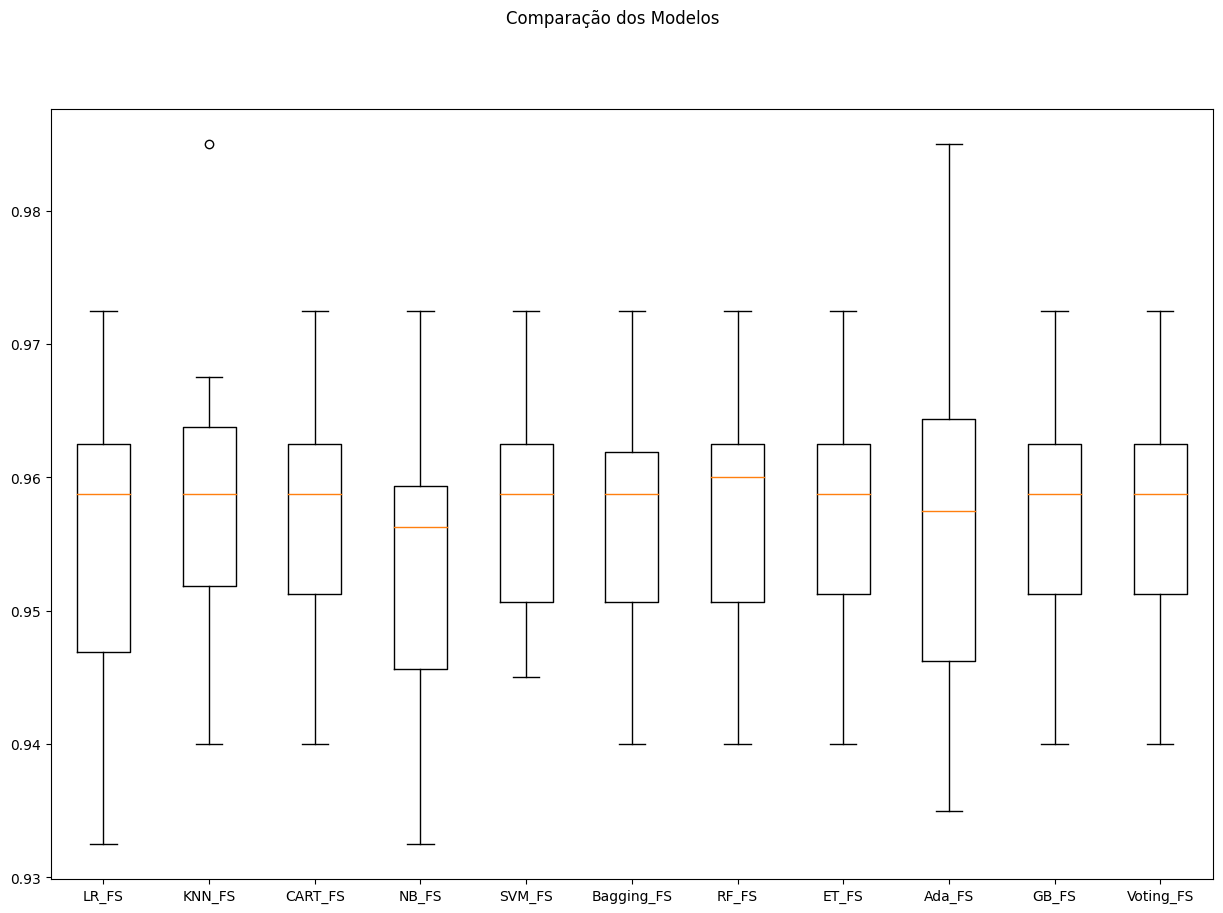

In [ ]:
np.random.seed(seed) # definindo uma semente global

# Lista que armazenará os modelos
models_FS = []

# Criando os modelos e adicionando-os na lista de modelos
models_FS.append(('LR_FS', LogisticRegression(max_iter=200)))
models_FS.append(('KNN_FS', KNeighborsClassifier()))
models_FS.append(('CART_FS', DecisionTreeClassifier()))
models_FS.append(('NB_FS', GaussianNB()))
models_FS.append(('SVM_FS', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases_FS = []
model1 = LogisticRegression(max_iter=200)
bases_FS.append(('logistic_FS', model1))
model2 = DecisionTreeClassifier()
bases_FS.append(('cart_FS', model2))
model3 = SVC()
bases_FS.append(('svm_FS', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models_FS.append(('Bagging_FS', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models_FS.append(('RF_FS', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models_FS.append(('ET_FS', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models_FS.append(('Ada_FS', AdaBoostClassifier(n_estimators=num_trees)))
models_FS.append(('GB_FS', GradientBoostingClassifier(n_estimators=num_trees)))
models_FS.append(('Voting_FS', VotingClassifier(bases)))

# Listas para armazenar os resultados
results_FS = []
names_FS = []

# Avaliação dos modelos
for name_FS, model_FS in models_FS:
    cv_results_FS = cross_val_score(model_FS, X_FS_train, y_FS_train, cv=kfold, scoring=scoring)
    results_FS.append(cv_results_FS)
    names_FS.append(name_FS)
    msg = "%s: %f (%f)" % (name_FS, cv_results_FS.mean(), cv_results_FS.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results_FS)
ax.set_xticklabels(names_FS)
plt.show()

Usaremos agora a padronização, normalização e pipelines nas colunas do feature selection


LR-orig_FS: 0.955 (0.012)
KNN-orig_FS: 0.959 (0.011)
CART-orig_FS: 0.957 (0.009)
NB-orig_FS: 0.953 (0.012)
SVM-orig_FS: 0.958 (0.008)
Bag-orig_FS: 0.956 (0.009)
RF-orig_FS: 0.958 (0.009)
ET-orig_FS: 0.957 (0.009)
Ada-orig_FS: 0.957 (0.014)
GB-orig_FS: 0.957 (0.009)
Vot-orig_FS: 0.956 (0.010)
LR-padr_FS: 0.955 (0.012)
KNN-padr_FS: 0.958 (0.011)
CART-padr_FS: 0.957 (0.009)
NB-padr_FS: 0.953 (0.012)
SVM-padr_FS: 0.958 (0.008)
Bag-padr_FS: 0.957 (0.008)
RF-padr_FS: 0.957 (0.009)
ET-padr_FS: 0.957 (0.009)
Ada-padr_FS: 0.957 (0.014)
GB-padr_FS: 0.957 (0.009)
Vot-padr_FS: 0.956 (0.010)
LR-norm_FS: 0.955 (0.012)
KNN-norm_FS: 0.959 (0.011)
CART-norm_FS: 0.957 (0.009)
NB-norm_FS: 0.953 (0.012)
SVM-norm_FS: 0.958 (0.008)
Bag-norm_FS: 0.956 (0.009)
RF-norm_FS: 0.957 (0.009)
ET-norm_FS: 0.957 (0.009)
Ada-norm_FS: 0.957 (0.014)
GB-norm_FS: 0.957 (0.009)
Vot-norm_FS: 0.956 (0.010)


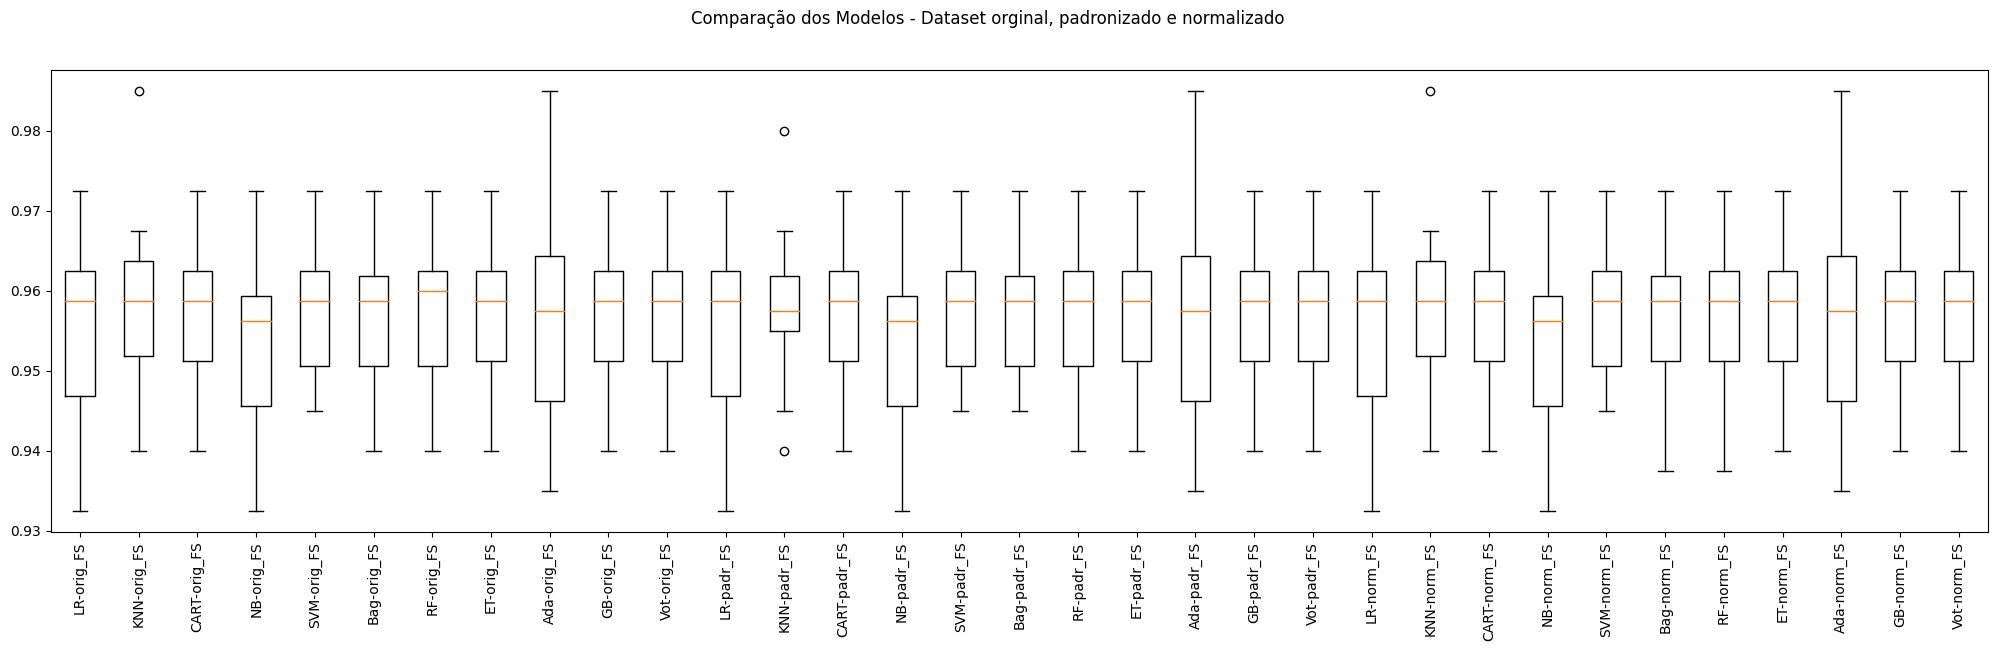

In [ ]:
np.random.seed(seed) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines_FS = []
results_FS = []
names_FS = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
bagging_FS = ('Bag_FS', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest_FS = ('RF_FS', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees_FS = ('ET_FS', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost_FS = ('Ada_FS', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting_FS = ('GB_FS', GradientBoostingClassifier(n_estimators=num_trees))
voting_FS = ('Voting_FS', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler_FS = ('StandardScaler_FS', StandardScaler())
min_max_scaler_FS = ('MinMaxScaler_FS', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines_FS.append(('LR-orig_FS', Pipeline([reg_log])))
pipelines_FS.append(('KNN-orig_FS', Pipeline([knn])))
pipelines_FS.append(('CART-orig_FS', Pipeline([cart])))
pipelines_FS.append(('NB-orig_FS', Pipeline([naive_bayes])))
pipelines_FS.append(('SVM-orig_FS', Pipeline([svm])))
pipelines_FS.append(('Bag-orig_FS', Pipeline([bagging])))
pipelines_FS.append(('RF-orig_FS', Pipeline([random_forest])))
pipelines_FS.append(('ET-orig_FS', Pipeline([extra_trees])))
pipelines_FS.append(('Ada-orig_FS', Pipeline([adaboost])))
pipelines_FS.append(('GB-orig_FS', Pipeline([gradient_boosting])))
pipelines_FS.append(('Vot-orig_FS', Pipeline([voting])))

# Dataset Padronizado
pipelines_FS.append(('LR-padr_FS', Pipeline([standard_scaler, reg_log])))
pipelines_FS.append(('KNN-padr_FS', Pipeline([standard_scaler, knn])))
pipelines_FS.append(('CART-padr_FS', Pipeline([standard_scaler, cart])))
pipelines_FS.append(('NB-padr_FS', Pipeline([standard_scaler, naive_bayes])))
pipelines_FS.append(('SVM-padr_FS', Pipeline([standard_scaler, svm])))
pipelines_FS.append(('Bag-padr_FS', Pipeline([standard_scaler, bagging])))
pipelines_FS.append(('RF-padr_FS', Pipeline([standard_scaler, random_forest])))
pipelines_FS.append(('ET-padr_FS', Pipeline([standard_scaler, extra_trees])))
pipelines_FS.append(('Ada-padr_FS', Pipeline([standard_scaler, adaboost])))
pipelines_FS.append(('GB-padr_FS', Pipeline([standard_scaler, gradient_boosting])))
pipelines_FS.append(('Vot-padr_FS', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines_FS.append(('LR-norm_FS', Pipeline([min_max_scaler, reg_log])))
pipelines_FS.append(('KNN-norm_FS', Pipeline([min_max_scaler, knn])))
pipelines_FS.append(('CART-norm_FS', Pipeline([min_max_scaler, cart])))
pipelines_FS.append(('NB-norm_FS', Pipeline([min_max_scaler, naive_bayes])))
pipelines_FS.append(('SVM-norm_FS', Pipeline([min_max_scaler, svm])))
pipelines_FS.append(('Bag-norm_FS', Pipeline([min_max_scaler, bagging])))
pipelines_FS.append(('RF-norm_FS', Pipeline([min_max_scaler, random_forest])))
pipelines_FS.append(('ET-norm_FS', Pipeline([min_max_scaler, extra_trees])))
pipelines_FS.append(('Ada-norm_FS', Pipeline([min_max_scaler, adaboost])))
pipelines_FS.append(('GB-norm_FS', Pipeline([min_max_scaler, gradient_boosting])))
pipelines_FS.append(('Vot-norm_FS', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name_FS, model_FS in pipelines_FS:
    cv_results_FS = cross_val_score(model_FS, X_FS_train, y_FS_train, cv=kfold, scoring=scoring)
    results_FS.append(cv_results_FS)
    names_FS.append(name_FS)
    msg = "%s: %.3f (%.3f)" % (name_FS, cv_results_FS.mean(), cv_results_FS.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results_FS)
ax.set_xticklabels(names_FS, rotation=90)
plt.show()

# 6. Avaliando o modelo final

Após toda a avaliação dos modelos do feature selection, percebemos que a acurácia do modelo diminuiu.

Por esse motivo, utilizaremos o dataset normal, com todas as colunas.

Após todas as avaliações, o GradientBoost teve o melhor resultado. Escolheremos esse modelo.

In [ ]:
# Tuning do GradientBoost

np.random.seed(seed) # definindo uma semente global para este bloco

pipelines_HP_GB= []

# Definindo os componentes do pipeline
GB = GradientBoostingClassifier()
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

pipelines_HP_GB.append(('GB-orig', Pipeline(steps=[('GB', GB)])))
pipelines_HP_GB.append(('GB-padr', Pipeline(steps=[('Scaler', standard_scaler), ('GB', GB)])))
pipelines_HP_GB.append(('GB-norm', Pipeline(steps=[('Scaler', min_max_scaler), ('GB', GB)])))

#param_grid = {
    #'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    #'metric': ["euclidean", "manhattan", "minkowski"],
#}


param_grid_GB = {
    'GB__n_estimators': [50, 100, 150],  # Exemplo de parâmetro específico para GradientBoosting
    'GB__learning_rate': [0.1, 0.5, 1.0],  # Exemplo de parâmetro específico para GradientBoosting
}

# Prepara e executa o GridSearchCV - GradientBoost
for name, model in pipelines_HP_GB:
    gridGB = GridSearchCV(estimator=model, param_grid=param_grid_GB, scoring=scoring, cv=kfold)
    gridGB.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, gridGB.best_score_, gridGB.best_params_))





Sem tratamento de missings: GB-orig - Melhor: 0.975750 usando {'GB__learning_rate': 0.1, 'GB__n_estimators': 50}
Sem tratamento de missings: GB-padr - Melhor: 0.975750 usando {'GB__learning_rate': 0.1, 'GB__n_estimators': 50}
Sem tratamento de missings: GB-norm - Melhor: 0.975750 usando {'GB__learning_rate': 0.1, 'GB__n_estimators': 50}


Gerando uma matriz de confusão com o modelo do Gradient Boosting

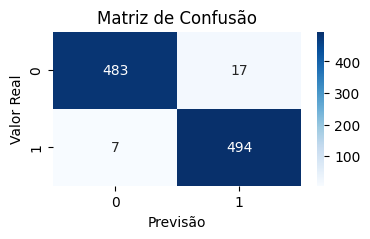

Relatório de Classificação para Gradient Boosting Classifier:
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       500
         1.0       0.97      0.99      0.98       501

    accuracy                           0.98      1001
   macro avg       0.98      0.98      0.98      1001
weighted avg       0.98      0.98      0.98      1001



In [ ]:
# Criando o modelo Gradient Boosting
gb_confusao = GradientBoostingClassifier(n_estimators=num_trees)

# Treinando o modelo
gb_confusao.fit(X_train, y_train)

# Fazendo previsões com o modelo
y_confusao_pred = gb_confusao.predict(X_test)


confusao = confusion_matrix(y_test, y_confusao_pred)

plt.figure(figsize=(4, 2))
sns.heatmap(confusao, annot=True, cmap="Blues", fmt="d", cbar=True)
plt.title("Matriz de Confusão")
plt.xlabel("Previsão")
plt.ylabel("Valor Real")
plt.show()

classification_rep_gb = classification_report(y_test, y_confusao_pred)
print("Relatório de Classificação para Gradient Boosting Classifier:")
print(classification_rep_gb)

Pelos resultados plotados na matriz de confusão, chegamos a algumas conclusões:

 - A quantidade de precisão em acertas pessoas do gênero masculino ficou  levemente maior em relação ao gênero feminino.

 - Acrescentando novos dados, acreditamos que o modelo está pronto para melhores previsões.

 - O dataset é pequeno e com poucas colunas, mas caso seja viável em um futuro, adionar mais colunas com característiscas diferentes para um melhor desempenho e acertividade.

# 7. Finalização do modelo


In [ ]:
# Avaliação do modelo com o conjunto de testes - GradientBoost

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = GradientBoostingClassifier(n_estimators=50)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print("GB: {} " .format((accuracy_score(y_test, predictions))))




GB: 0.978021978021978 


In [ ]:
# Preparação do modelo com TODO o dataset
model.fit(X, y)


GradientBoostingClassifier(n_estimators=50)